Topic:        Challenge Set 7

Subject:      Classification

Date:         02/04/2018

Name:         Brian Kim

Worked with:  N/A

In [125]:

#Preprocessing 
import itertools
from sklearn import preprocessing
import re
from sklearn import feature_selection as f_select
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly import tools
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline

# import warnings
# warnings.filterwarnings('ignore')


sns.set_style("darkgrid")
import sklearn.linear_model
import os
import math
import statsmodels.api as sm
import pylab as pl
from sklearn.metrics import roc_curve, auc
from __future__ import print_function, division

# Necessary imports


import patsy
import seaborn as sns





In [48]:
headers = ['party', 'hndcp_infants','wat_prjt_cost_shar', 'adopt_budg_res',\
           'phys_fee_frz','el_sal_aid','rel_grps_in_schools','anti_sat_test_ban',\
           'aid_nic_contras','mx_miss','imm','synfuels_corp_cut','ed_spend',\
           'sprfnd_rt_sue','crime','dty_fr_exp','exp_adm_act_s_afr']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',\
                 header=0,names = headers)

In [52]:
headers1 = [ 'hndcp_infants','wat_prjt_cost_shar', 'adopt_budg_res',\
           'phys_fee_frz','el_sal_aid','rel_grps_in_schools','anti_sat_test_ban',\
           'aid_nic_contras','mx_miss','imm','synfuels_corp_cut','ed_spend',\
           'sprfnd_rt_sue','crime','dty_fr_exp','exp_adm_act_s_afr']

In [50]:
df.replace(to_replace='y', value= 1, inplace=True)
df.replace (to_replace='n', value=0, inplace=True)
df.replace("?", np.nan)

,party,hndcp_infants,wat_prjt_cost_shar,adopt_budg_res,phys_fee_frz,el_sal_aid,rel_grps_in_schools,anti_sat_test_ban,aid_nic_contras,mx_miss,imm,synfuels_corp_cut,ed_spend,sprfnd_rt_sue,crime,dty_fr_exp,exp_adm_act_s_afr
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
1,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
4,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
6,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
8,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [42]:
#replace with average value of column.
df.astype('float64', errors = 'ignore')



,party,hndcp_infants,wat_prjt_cost_shar,adopt_budg_res,phys_fee_frz,el_sal_aid,rel_grps_in_schools,anti_sat_test_ban,aid_nic_contras,mx_miss,imm,synfuels_corp_cut,ed_spend,sprfnd_rt_sue,crime,dty_fr_exp,exp_adm_act_s_afr
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
1,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
5,democrat,0,1,0,1,1,1,0,0,0,0,0,0,?,1,1,1
6,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,?,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
8,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,?,?
9,republican,0,1,0,1,1,0,0,0,0,0,?,?,1,1,0,0


In [53]:
df[headers1] = df[headers1].apply(pd.to_numeric, errors='coerce', axis=1)

In [66]:
df =df.fillna(df.mean())

In [68]:
df

,party,hndcp_infants,wat_prjt_cost_shar,adopt_budg_res,phys_fee_frz,el_sal_aid,rel_grps_in_schools,anti_sat_test_ban,aid_nic_contras,mx_miss,imm,synfuels_corp_cut,ed_spend,sprfnd_rt_sue,crime,dty_fr_exp,exp_adm_act_s_afr
0,republican,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812121
1,democrat,0.443128,1.000000,1.000000,0.416076,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
2,democrat,0.000000,1.000000,1.000000,0.000000,0.50358,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
3,democrat,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.421836,1.000000,1.000000,1.000000,1.000000
4,democrat,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
5,democrat,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508557,1.000000,1.000000,1.000000
6,republican,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.428571,1.000000
7,republican,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
8,democrat,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.812121
9,republican,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362319,0.421836,1.000000,1.000000,0.000000,0.000000


In [74]:
X= df[headers1]
X
y= df['party']from sklearn.metrics import accuracy_score



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from __future__ import print_function

from sklearn import metrics


Challenge 3: Which K gives the highest accuracy?


In [104]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

y_pred = knn.predict(X_test)


print(metrics.accuracy_score(y_test, y_pred))



1.0


Challenge 4: logistic regression with accuracy score

In [107]:

from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)
y_pred= clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.965277777778


Challenge 5: bar graph of democrats and republicans

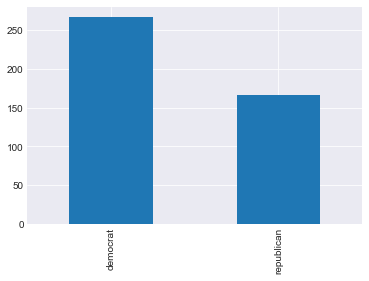

In [108]:
pd.value_counts(df['party']).plot.bar()

In [109]:
p = pd.value_counts(df['party'])
print (p)

democrat      267
republican    167
Name: party, dtype: int64


In [110]:
def dem(x):
    y = []
    for x in range(len(x)):
        y.append["democrat"]
    return y



In [134]:

train_sizes, train_scores, valid_scores = learning_curve\
(LogisticRegression(), X, y, train_sizes=[50, 80, 110], cv=5)


In [135]:
from sklearn.learning_curve import learning_curve

In [136]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



Automatically created module for IPython interactive environment


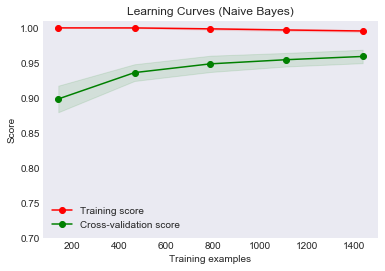

In [139]:



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()